<a href="https://colab.research.google.com/github/SushruthPatil/Student-Grade-Prediction/blob/main/StudentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np     #import packages
import pandas as pd
import sklearn

#Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/aidataset.csv")

dataset.head
dataset.shape

(1000, 9)

In [18]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   DP score                     1000 non-null   int64  
 6   reading score                1000 non-null   int64  
 7   writing score                1000 non-null   int64  
 8   Unnamed: 8                   0 non-null      float64
dtypes: float64(1), int64(3), object(5)
memory usage: 70.4+ KB


In [19]:
dataset.describe()

,DP score,reading score,writing score,Unnamed: 8
count,1000.00000,1000.000000,1000.000000,0.0
mean,66.08900,69.169000,68.054000,NaN
std,15.16308,14.600192,15.195657,NaN
min,0.00000,17.000000,10.000000,NaN
25%,57.00000,59.000000,57.750000,NaN
50%,66.00000,70.000000,69.000000,NaN
75%,77.00000,79.000000,79.000000,NaN
max,100.00000,100.000000,100.000000,NaN


In [20]:
#Checking if there are any null values(Data Cleaning)
dataset.isnull().sum()*100/dataset.shape[0]

#There are no null values. Hence, the data is clean

Gender                           0.0
race/ethnicity                   0.0
parental level of education      0.0
lunch                            0.0
test preparation course          0.0
DP score                         0.0
reading score                    0.0
writing score                    0.0
Unnamed: 8                     100.0
dtype: float64

In [21]:
dataset.drop('Unnamed: 8', inplace=True, axis=1)
dataset.isnull().sum()*100/dataset.shape[0]

Gender                         0.0
race/ethnicity                 0.0
parental level of education    0.0
lunch                          0.0
test preparation course        0.0
DP score                       0.0
reading score                  0.0
writing score                  0.0
dtype: float64

In [22]:
#Get dummy variables for the feature 'race/ethnicity' and store it in a new variable - 'status'
status = pd.get_dummies(dataset['race/ethnicity'])
status.head()

,group A,group B,group C,group D,group E
0,0,1,0,0,0
1,0,0,1,0,0
2,0,1,0,0,0
3,1,0,0,0,0
4,0,0,1,0,0


In [23]:
#Check the dataframe dataset now
dataset.head()

,Gender,race/ethnicity,parental level of education,lunch,test preparation course,DP score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [24]:
#Lets drop the first column from status df using 'drop_first = True' function
status = pd.get_dummies(dataset['parental level of education'],drop_first = True)
dataset = pd.concat([dataset, status], axis = 1)
dataset.head()

,Gender,race/ethnicity,parental level of education,lunch,test preparation course,DP score,reading score,writing score,bachelor's degree,high school,master's degree,some college,some high school
0,female,group B,bachelor's degree,standard,none,72,72,74,1,0,0,0,0
1,female,group C,some college,standard,completed,69,90,88,0,0,0,1,0
2,female,group B,master's degree,standard,none,90,95,93,0,0,1,0,0
3,male,group A,associate's degree,free/reduced,none,47,57,44,0,0,0,0,0
4,male,group C,some college,standard,none,76,78,75,0,0,0,1,0


In [25]:
#Lets drop the first column from status df using 'drop_first = True' function
status = pd.get_dummies(dataset['race/ethnicity'],drop_first = True)
dataset = pd.concat([dataset, status], axis = 1)
dataset.head()

,Gender,race/ethnicity,parental level of education,lunch,test preparation course,DP score,reading score,writing score,bachelor's degree,high school,master's degree,some college,some high school,group B,group C,group D,group E
0,female,group B,bachelor's degree,standard,none,72,72,74,1,0,0,0,0,1,0,0,0
1,female,group C,some college,standard,completed,69,90,88,0,0,0,1,0,0,1,0,0
2,female,group B,master's degree,standard,none,90,95,93,0,0,1,0,0,1,0,0,0
3,male,group A,associate's degree,free/reduced,none,47,57,44,0,0,0,0,0,0,0,0,0
4,male,group C,some college,standard,none,76,78,75,0,0,0,1,0,0,1,0,0


In [26]:
#Drop race/ethnicity column as we have its dummies

dataset.drop(['race/ethnicity'], axis = 1, inplace = True)
dataset.head()

,Gender,parental level of education,lunch,test preparation course,DP score,reading score,writing score,bachelor's degree,high school,master's degree,some college,some high school,group B,group C,group D,group E
0,female,bachelor's degree,standard,none,72,72,74,1,0,0,0,0,1,0,0,0
1,female,some college,standard,completed,69,90,88,0,0,0,1,0,0,1,0,0
2,female,master's degree,standard,none,90,95,93,0,0,1,0,0,1,0,0,0
3,male,associate's degree,free/reduced,none,47,57,44,0,0,0,0,0,0,0,0,0
4,male,some college,standard,none,76,78,75,0,0,0,1,0,0,1,0,0


In [27]:
#Drop parental level of education column as we have its dummies

dataset.drop(['parental level of education'], axis = 1, inplace = True)
dataset.head()

,Gender,lunch,test preparation course,DP score,reading score,writing score,bachelor's degree,high school,master's degree,some college,some high school,group B,group C,group D,group E
0,female,standard,none,72,72,74,1,0,0,0,0,1,0,0,0
1,female,standard,completed,69,90,88,0,0,0,1,0,0,1,0,0
2,female,standard,none,90,95,93,0,0,1,0,0,1,0,0,0
3,male,free/reduced,none,47,57,44,0,0,0,0,0,0,0,0,0
4,male,standard,none,76,78,75,0,0,0,1,0,0,1,0,0


In [39]:
dataset['lunch'].replace('standard', 1, inplace=True)
dataset['lunch'].replace('free/reduced', 0, inplace=True)
dataset['Gender'].replace('female', 0, inplace=True)
dataset['Gender'].replace('male', 1, inplace=True)
dataset['test preparation course'].replace('completed', 1, inplace=True)
dataset['test preparation course'].replace('none', 0, inplace=True)
dataset.head()

,Gender,lunch,test preparation course,DP score,reading score,writing score,bachelor's degree,high school,master's degree,some college,some high school,group B,group C,group D,group E
0,0,1,0,72,72,74,1,0,0,0,0,1,0,0,0
1,0,1,1,69,90,88,0,0,0,1,0,0,1,0,0
2,0,1,0,90,95,93,0,0,1,0,0,1,0,0,0
3,1,0,0,47,57,44,0,0,0,0,0,0,0,0,0
4,1,1,0,76,78,75,0,0,0,1,0,0,1,0,0


In [40]:
#checking for categorical data

print(dataset.dtypes)

Gender                     int64
lunch                      int64
test preparation course    int64
DP score                   int64
reading score              int64
writing score              int64
bachelor's degree          uint8
high school                uint8
master's degree            uint8
some college               uint8
some high school           uint8
group B                    uint8
group C                    uint8
group D                    uint8
group E                    uint8
dtype: object


In [41]:
#now separating dependent and inddependent variables

import sklearn
x = dataset.iloc[:,1:].values
y = dataset.iloc[:,0].values

#splitting dataset into training and testing dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 1/3, random_state = 0)

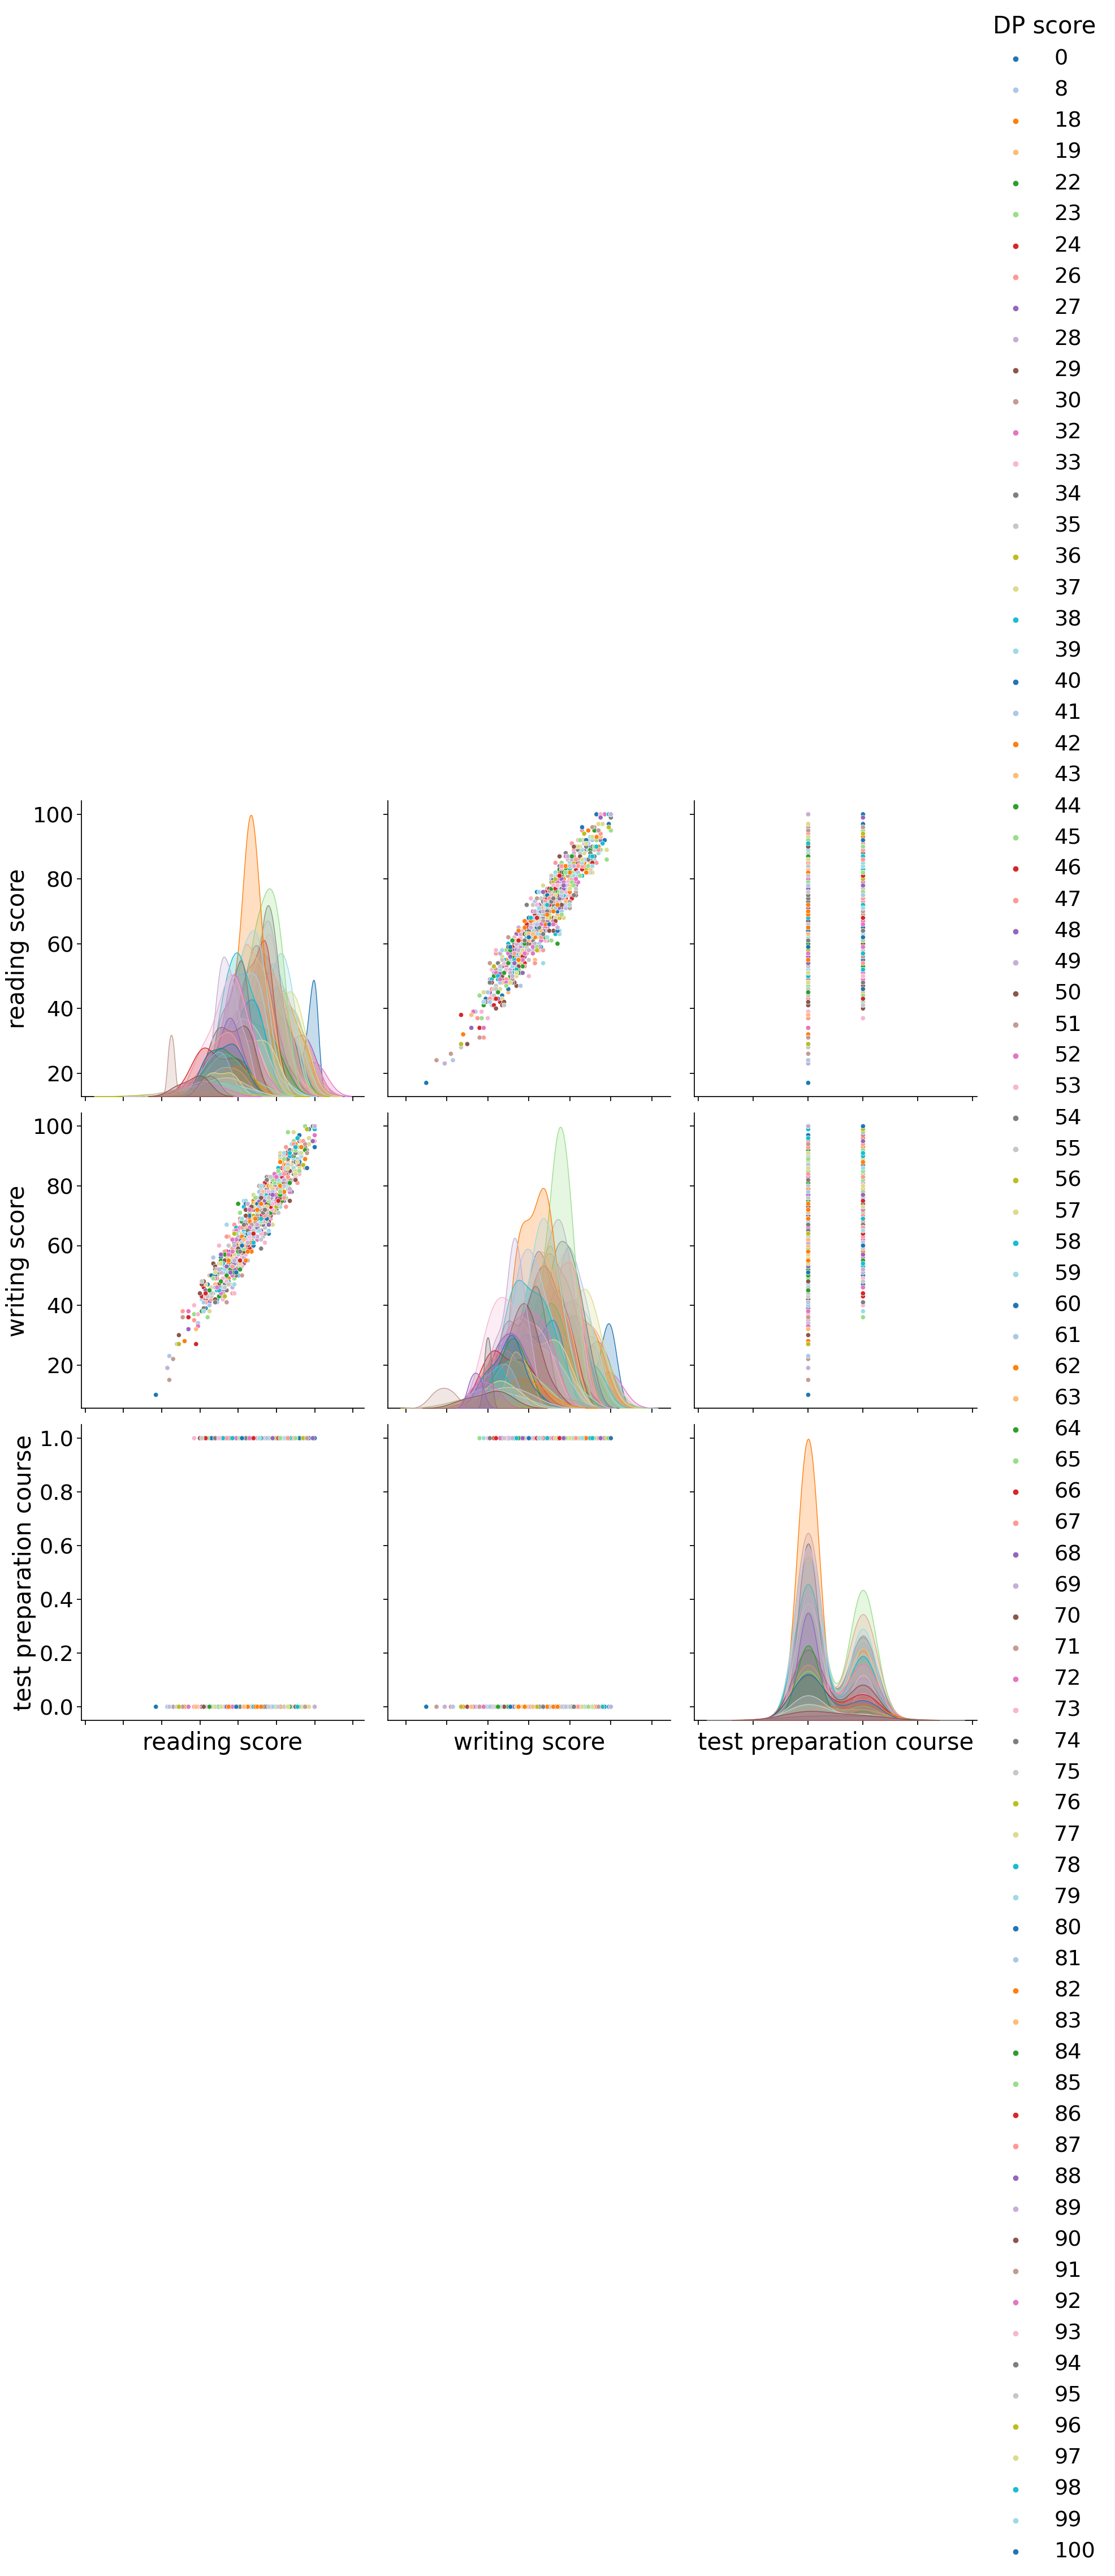

In [42]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

y_pred = regressor.predict(x_test)
with sns.plotting_context("notebook",font_scale = 2.5):
  g = sns.pairplot(dataset[['reading score','writing score','test preparation course','DP score']],hue='DP score', palette = 'tab20', size = 6)

g.set(xticklabels=[])


In [43]:
prediction = regressor.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,prediction)

0.6326316001836683

In [46]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset

# Preprocessing the data
X = dataset.drop('DP score', axis=1)
y = dataset['DP score']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the decision tree model
tree_model = DecisionTreeRegressor(random_state=42)

# Create the random forest model
forest_model = RandomForestRegressor(random_state=42)

# Create the linear regression model
lr_model = LinearRegression()

# Fit the models on the training data
tree_model.fit(X_train, y_train)
forest_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)

# Evaluate the models on the testing data
tree_pred = tree_model.predict(X_test)
tree_rmse = np.sqrt(mean_squared_error(y_test, tree_pred))
tree_r2 = r2_score(y_test, tree_pred)

forest_pred = forest_model.predict(X_test)
forest_rmse = np.sqrt(mean_squared_error(y_test, forest_pred))
forest_r2 = r2_score(y_test, forest_pred)

lr_pred = lr_model.predict(X_test)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))
lr_r2 = r2_score(y_test, lr_pred)

print('Decision Tree RMSE:', tree_rmse)
print('Decision Tree R2 Score:', tree_r2)
print('Random Forest RMSE:', forest_rmse)
print('Random Forest R2 Score:', forest_r2)
print('Linear Regression RMSE:', lr_rmse)
print('Linear Regression R2 Score:', lr_r2)

Decision Tree RMSE: 8.206095295571457
Decision Tree R2 Score: 0.7232660361044537
Random Forest RMSE: 6.054867179533452
Random Forest R2 Score: 0.8493397813013015
Linear Regression RMSE: 5.393993869732844
Linear Regression R2 Score: 0.8804332983749564
